In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Problem 1

In [40]:
var = pd.read_csv("./diabetes.csv")
var.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [41]:
var.shape

(768, 9)

In [42]:
#Outcome = var.pop('Outcome')
#ExplanatoryVar = var.copy()
Outcome = var.values[:,8]
ExplanatoryVar = var.values[:,0:8]
Outcome.shape

(768,)

In [43]:
#Splitting the Data Training and Testing Sets
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
ExplanatoryVar_train, ExplanatoryVar_test, Outcome_train, Outcome_test = train_test_split(ExplanatoryVar, Outcome, train_size = 0.8, test_size = 0.2)

In [44]:
Outcome_test.shape

(154,)

In [45]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# normalizing the input data and target column
scaler = StandardScaler()
ExplanatoryVar_train = scaler.fit_transform(ExplanatoryVar_train)
ExplanatoryVar_test = scaler.fit_transform(ExplanatoryVar_test)

In [46]:
#from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(ExplanatoryVar_train,Outcome_train)

LogisticRegression(random_state=0)

In [47]:
Y_pred = classifier.predict(ExplanatoryVar_test)

In [48]:
Y_pred.shape

(154,)

In [49]:
#from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Outcome_test, Y_pred)
cnf_matrix

array([[94, 13],
       [18, 29]], dtype=int64)

In [50]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(Outcome_test, Y_pred))
print("Precision:", metrics.precision_score(Outcome_test, Y_pred))
print("Recall:", metrics.recall_score(Outcome_test, Y_pred))

Accuracy: 0.7987012987012987
Precision: 0.6904761904761905
Recall: 0.6170212765957447


Text(0.5, 257.44, 'Predicted label')

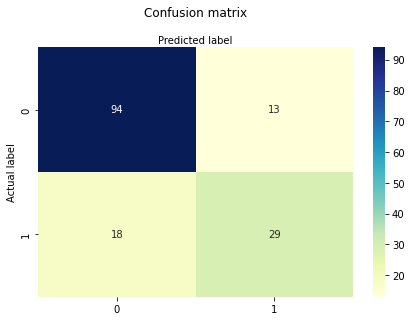

In [51]:
import seaborn as sns
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Problem 2

In [52]:
np.random.seed(0)
X_train, X_test, Y_train, Y_test = train_test_split(ExplanatoryVar, Outcome, train_size = 0.8, test_size = 0.2)

In [55]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# normalizing the input data and target column
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

## K_fold = 5

In [63]:
kfold = KFold(n_splits=5, random_state=0, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, ExplanatoryVar, Outcome, cv=kfold)
print("Average accuracy: %.3f%% Average standard deviation: (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))


Average accuracy: 76.425% Average standard deviation: (3.278%)


## K_fold = 10

In [64]:
kfold = KFold(n_splits=10, random_state=0, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, ExplanatoryVar, Outcome, cv=kfold)
print("Average accuracy: %.3f%% Average standard deviation: (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Average accuracy: 76.818% Average standard deviation: (3.744%)


# Problem 3 part 1

In [101]:
from sklearn.datasets import load_breast_cancer 

In [102]:
breast = load_breast_cancer() 

In [103]:
breast_data = breast.data 
breast_data.shape

(569, 30)

In [104]:
breast_target = breast.target
breast_target.shape

(569,)

In [105]:
breast_input = pd.DataFrame(breast_data)
breast_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [106]:
breast_target = pd.DataFrame(breast_target)
breast_target.head()

,0
0,0
1,0
2,0
3,0
4,0


In [107]:
import warnings
warnings.filterwarnings('ignore')

scaler = StandardScaler()
breast_input = scaler.fit_transform(breast_input)

In [108]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(breast_input, breast_target, train_size = 0.8, test_size = 0.2)

In [109]:
#from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [110]:
Y_pred = classifier.predict(X_test)

In [115]:
Y_pred.shape

(114,)

In [ ]:
#from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, Y_pred)
cnf_matrix

In [117]:
print("Accuracy:", metrics.accuracy_score(y_test, Y_pred))
print("Precision:", metrics.precision_score(y_test, Y_pred))
print("Recall:", metrics.recall_score(y_test, Y_pred))

Accuracy: 0.9649122807017544
Precision: 0.9701492537313433
Recall: 0.9701492537313433


Text(0.5, 257.44, 'Predicted label')

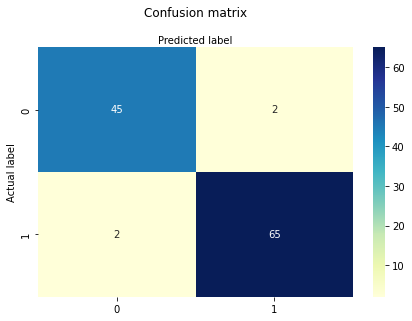

In [118]:
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Problem 3 part 2

In [120]:
C = [10, 1, .1, .01]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X_train, y_train)
    print('C:', c)
    print('Training accuracy:', clf.score(X_train, y_train))
    print('Test accuracy:', clf.score(X_test, y_test))
    print('')

C: 10
Training accuracy: 0.989010989010989
Test accuracy: 0.9473684210526315

C: 1
Training accuracy: 0.989010989010989
Test accuracy: 0.956140350877193

C: 0.1
Training accuracy: 0.9758241758241758
Test accuracy: 0.9736842105263158

C: 0.01
Training accuracy: 0.9318681318681319
Test accuracy: 0.9210526315789473



# Problem 4 part 1

In [121]:
kfold = KFold(n_splits=5, random_state=0, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, breast_input, breast_target, cv=kfold)
print("Average accuracy: %.3f%% Average standard deviation: (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Average accuracy: 97.193% Average standard deviation: (1.701%)


In [122]:
kfold = KFold(n_splits=10, random_state=0, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, breast_input, breast_target, cv=kfold)
print("Average accuracy: %.3f%% Average standard deviation: (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Average accuracy: 97.895% Average standard deviation: (2.046%)


# Problem 4 part 2

In [123]:
C = [10, 1, .1, .01]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X_train, y_train)
    print('C:', c)
    print('Training accuracy:', clf.score(X_train, y_train))
    print('Test accuracy:', clf.score(X_test, y_test))
    print('')

C: 10
Training accuracy: 0.989010989010989
Test accuracy: 0.9473684210526315

C: 1
Training accuracy: 0.989010989010989
Test accuracy: 0.956140350877193

C: 0.1
Training accuracy: 0.9758241758241758
Test accuracy: 0.9736842105263158

C: 0.01
Training accuracy: 0.9318681318681319
Test accuracy: 0.9210526315789473

